# Load downloaded Kaggle/UCI binary class dataset

In [1]:
import pandas as pd
df=pd.read_csv('kaggle.csv')

In [2]:
print(df.info())
print()
print(df.describe())
print()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       4500 non-null   float64
 1   Y       4500 non-null   float64
 2   Label   4500 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 105.6 KB
None

                 X            Y        Label
count  4500.000000  4500.000000  4500.000000
mean      0.000032    -0.000143     0.500000
std       0.523061     0.523166     0.500056
min      -1.070883    -1.088820     0.000000
25%      -0.286800    -0.286056     0.000000
50%      -0.000039     0.000273     0.500000
75%       0.285058     0.284515     1.000000
max       1.104762     1.114129     1.000000



,X,Y,Label
0,-0.294272,0.119440,1
1,-0.769678,0.614542,0
2,-0.224529,0.230621,1
3,-0.232324,0.929623,0
4,-0.931001,-0.283934,0


# Plot the dataset

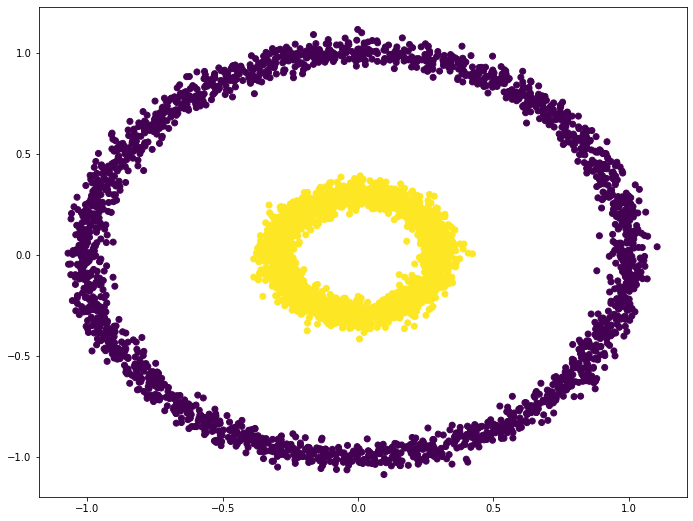

In [3]:
import pylab as pl

pl.figure(figsize=(10, 8))
pl.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

pl.subplot(111)

pl.scatter(df['X'], df['Y'],  c=df['Label'])
pl.show()


In [4]:
# KERNEL FUNCTION
df['Z'] = (df['X']**2 + df['Y']**2)

In [5]:
df

,X,Y,Label,Z
0,-0.294272,0.119440,1,0.100862
1,-0.769678,0.614542,0,0.970066
2,-0.224529,0.230621,1,0.103599
3,-0.232324,0.929623,0,0.918174
4,-0.931001,-0.283934,0,0.947382
...,...,...,...,...
4495,-0.203047,0.160110,1,0.066863
4496,-0.194357,0.207893,1,0.080994
4497,0.277293,-0.944938,0,0.969799
4498,0.825013,-0.508712,0,0.939433


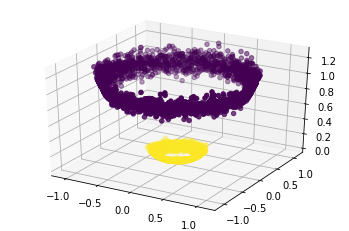

In [6]:
# visualizing data in higher dimension 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d') 
axes.scatter(df['X'], df['Y'], df['Z'], c = df['Label'], depthshade = True) 
plt.show() 

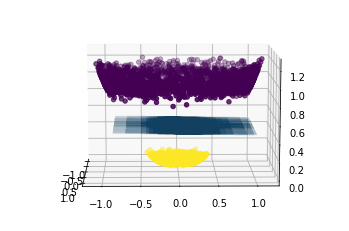

In [7]:
import numpy as np 
from sklearn import svm 
  
x1=df['X'].values
x1=x1.reshape((-1, 1))
x2=df['Y'].values
x2=x2.reshape((-1, 1))

svc = svm.SVC(kernel = 'linear') 
X3 = (x1**2 + x2**2) 
X = np.hstack((x1,x2, X3))
svc.fit(X, df['Label']) 
w = svc.coef_ 
b = svc.intercept_ 
  
# plotting the separating hyperplane 
x1, x2 = np.meshgrid(x1, x2) 
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 
  
fig = plt.figure() 
axes2 = fig.add_subplot(111, projection = '3d') 
axes2.scatter(df['X'], df['Y'], df['Z'], c = df['Label'], depthshade = True) 
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01)
# for rotate the axes and update.
for angle in range(0,360): 
    axes2.view_init(10,angle)
plt.show() 

# CUSTOM KERNEL

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
#custom kernel
def fn_kernel(x1, x2):
    
    return np.array(np.dot(x1, x2.T) ** 2)
  
x1=df['X'].values
x1=x1.reshape((-1, 1))
x2=df['Y'].values
x2=x2.reshape((-1, 1))

X = np.hstack((x1,x2))
# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=fn_kernel,probability=True)
clf.fit(X, df['Label']) 
from scipy import interp
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

<ipython-input-10-bae92892e8b1>:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-10-bae92892e8b1>:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-10-bae92892e8b1>:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-10-bae92892e8b1>:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-10-bae92892e8b1>:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-10-bae92892e8b1>:29: DeprecationWarning: scipy.interp is dep

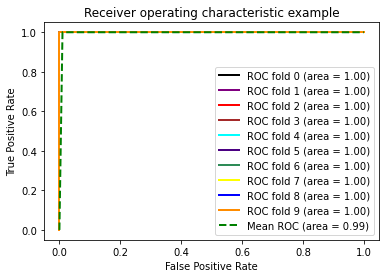

scores:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  1.0
tpr:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
tpr mean:  1.0
fpr:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
fpr mean:  0.0


In [10]:
# Run classifier with cross-validation and plot ROC curves
cv = KFold(n_splits=10)
classifier = clf

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['black','purple','red','brown','cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
y=df['Label']
tprprintlist=[]
fprprintlist=[]
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    preds= classifier.fit(X[train], y[train]).predict(X[test])
#     preds=pd.Series(preds)
#     print(y[test].tolist())
#     print(preds.tolist())
    tn, fp, fn, tp=confusion_matrix(y[test].tolist(), preds.tolist()).ravel()
    
    tprprint=tp/(tp+fp)
    fprprint=fp/(fp+tn)
    # Compute ROC curve and area the curve
    tprprintlist.append(tprprint)
    fprprintlist.append(fprprint)
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1


mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, df['Label'], cv=10)
print('scores: ',scores.tolist())
print('mean accuracy: ',(sum(scores.tolist())/len(scores.tolist())))
print('tpr: ',tprprintlist)
tprprintlist=list(filter(lambda a: ~np.isnan(a), tprprintlist))
print('tpr mean: ',(sum(tprprintlist)/len(tprprintlist)))
print('fpr: ',fprprintlist)
print('fpr mean: ',(sum(fprprintlist)/len(fprprintlist)))

# LINEAR

<ipython-input-11-3a51dbe98208>:25: RuntimeWarning: invalid value encountered in longlong_scalars
  tprprint=tp/(tp+fp)
<ipython-input-11-3a51dbe98208>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-11-3a51dbe98208>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-11-3a51dbe98208>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-11-3a51dbe98208>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-11-3a51dbe98208>:25: RuntimeWarning: invalid value encountered in longlong_scalars
  tprprint=tp/(tp+fp)
<ipython-input-11-3a

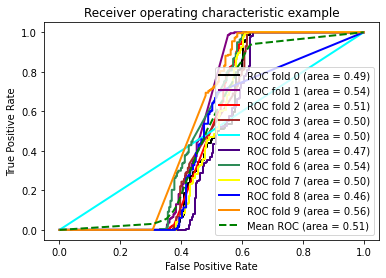

scores:  [0.6777777777777778, 0.6711111111111111, 0.6822222222222222, 0.6755555555555556, 0.6911111111111111, 0.6933333333333334, 0.6733333333333333, 0.6911111111111111, 0.6822222222222222, 0.6577777777777778]
mean accuracy:  0.6795555555555556
tpr:  [nan, 0.5799457994579946, 0.587431693989071, 0.5888888888888889, nan, nan, 0.5837837837837838, nan, 0.0, 0.5767195767195767]
tpr mean:  0.48612829047321915
fpr:  [0.0, 0.6595744680851063, 0.6452991452991453, 0.6244725738396625, 0.0, 0.0, 0.6609442060085837, 0.0, 0.13122171945701358, 0.6926406926406926]
fpr mean:  0.3414152805330204


In [11]:
clf = svm.SVC(kernel='linear',probability=True)
clf.fit(X, df['Label']) 
# Run classifier with cross-validation and plot ROC curves
cv = KFold(n_splits=10)
classifier = clf

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['black','purple','red','brown','cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
y=df['Label']
tprprintlist=[]
fprprintlist=[]
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    preds= classifier.fit(X[train], y[train]).predict(X[test])
#     preds=pd.Series(preds)
#     print(y[test].tolist())
#     print(preds.tolist())
    tn, fp, fn, tp=confusion_matrix(y[test].tolist(), preds.tolist()).ravel()
    
    tprprint=tp/(tp+fp)
    fprprint=fp/(fp+tn)
    # Compute ROC curve and area the curve
    tprprintlist.append(tprprint)
    fprprintlist.append(fprprint)
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1


mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, df['Label'], cv=10)
print('scores: ',scores.tolist())
print('mean accuracy: ',(sum(scores.tolist())/len(scores.tolist())))
print('tpr: ',tprprintlist)
tprprintlist=list(filter(lambda a: ~np.isnan(a), tprprintlist))
print('tpr mean: ',(sum(tprprintlist)/len(tprprintlist)))
print('fpr: ',fprprintlist)
print('fpr mean: ',(sum(fprprintlist)/len(fprprintlist)))

# GAUSSIAN

<ipython-input-12-adebd7b87632>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-12-adebd7b87632>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-12-adebd7b87632>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-12-adebd7b87632>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-12-adebd7b87632>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-12-adebd7b87632>:31: DeprecationWarning: scipy.interp is dep

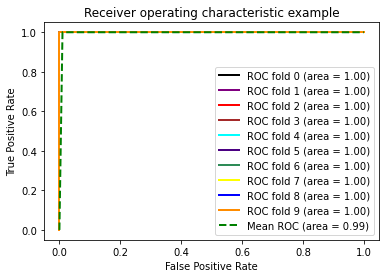

scores:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
mean accuracy:  1.0
tpr:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
tpr mean:  1.0
fpr:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
fpr mean:  0.0


In [12]:
clf = svm.SVC(kernel='rbf',probability=True)
clf.fit(X, df['Label']) 
# Run classifier with cross-validation and plot ROC curves
cv = KFold(n_splits=10)
classifier = clf

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['black','purple','red','brown','cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
y=df['Label']
tprprintlist=[]
fprprintlist=[]
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    preds= classifier.fit(X[train], y[train]).predict(X[test])
#     preds=pd.Series(preds)
#     print(y[test].tolist())
#     print(preds.tolist())
    tn, fp, fn, tp=confusion_matrix(y[test].tolist(), preds.tolist()).ravel()
    
    tprprint=tp/(tp+fp)
    fprprint=fp/(fp+tn)
    # Compute ROC curve and area the curve
    tprprintlist.append(tprprint)
    fprprintlist.append(fprprint)
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1


mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, df['Label'], cv=10)
print('scores: ',scores.tolist())
print('mean accuracy: ',(sum(scores.tolist())/len(scores.tolist())))
print('tpr: ',tprprintlist)
tprprintlist=list(filter(lambda a: ~np.isnan(a), tprprintlist))
print('tpr mean: ',(sum(tprprintlist)/len(tprprintlist)))
print('fpr: ',fprprintlist)
print('fpr mean: ',(sum(fprprintlist)/len(fprprintlist)))

# POLYNOMIAL

<ipython-input-13-f48ae1f29584>:25: RuntimeWarning: invalid value encountered in longlong_scalars
  tprprint=tp/(tp+fp)
<ipython-input-13-f48ae1f29584>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-13-f48ae1f29584>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-13-f48ae1f29584>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-13-f48ae1f29584>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
<ipython-input-13-f48ae1f29584>:25: RuntimeWarning: invalid value encountered in longlong_scalars
  tprprint=tp/(tp+fp)
<ipython-input-13-f4

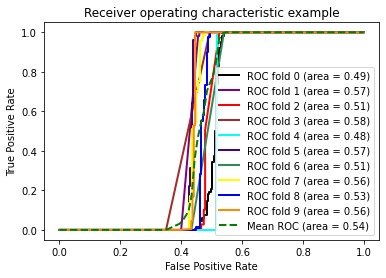

scores:  [0.6466666666666666, 0.6822222222222222, 0.6577777777777778, 0.6311111111111111, 0.6133333333333333, 0.6555555555555556, 0.6377777777777778, 0.6222222222222222, 0.62, 0.6688888888888889]
mean accuracy:  0.6435555555555555
tpr:  [nan, 0.5906593406593407, 0.5567010309278351, 0.5489690721649485, nan, nan, 0.5636363636363636, nan, 0.5768261964735516, 0.5902964959568733]
tpr mean:  0.5711814166364855
fpr:  [0.0, 0.6340425531914894, 0.7350427350427351, 0.7383966244725738, 0.0, 0.0, 0.721030042918455, 0.0, 0.7601809954751131, 0.658008658008658]
fpr mean:  0.42467016091090243


In [13]:
clf = svm.SVC(kernel='poly',probability=True)
clf.fit(X, df['Label']) 
# Run classifier with cross-validation and plot ROC curves
cv = KFold(n_splits=10)
classifier = clf

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['black','purple','red','brown','cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
y=df['Label']
tprprintlist=[]
fprprintlist=[]
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    preds= classifier.fit(X[train], y[train]).predict(X[test])
#     preds=pd.Series(preds)
#     print(y[test].tolist())
#     print(preds.tolist())
    tn, fp, fn, tp=confusion_matrix(y[test].tolist(), preds.tolist()).ravel()
    
    tprprint=tp/(tp+fp)
    fprprint=fp/(fp+tn)
    # Compute ROC curve and area the curve
    tprprintlist.append(tprprint)
    fprprintlist.append(fprprint)
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1


mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, df['Label'], cv=10)
print('scores: ',scores.tolist())
print('mean accuracy: ',(sum(scores.tolist())/len(scores.tolist())))
print('tpr: ',tprprintlist)
tprprintlist=list(filter(lambda a: ~np.isnan(a), tprprintlist))
print('tpr mean: ',(sum(tprprintlist)/len(tprprintlist)))
print('fpr: ',fprprintlist)
print('fpr mean: ',(sum(fprprintlist)/len(fprprintlist)))